## **TP1 - Vinicius Silva Gomes**

Aqui serão descritas as querys para o TP1 da disciplina DCC011 - Introdução a Banco de Dados. O arquivo de resposta enviado para avaliação é o **submission.sql** que se encontra no VPL destinado a submissão do trabalho.

Este arquivo contempla somente as querys e maiores descrições que possam ser úteis para a resolução das atividades.

Todos os arquivos necessários e maiores informações podem ser encontradas no [Moodle](https://virtual.ufmg.br/20212/course/view.php?id=497) da disciplina.<br><br>

---

### **Esquema do banco de dados utilizado**
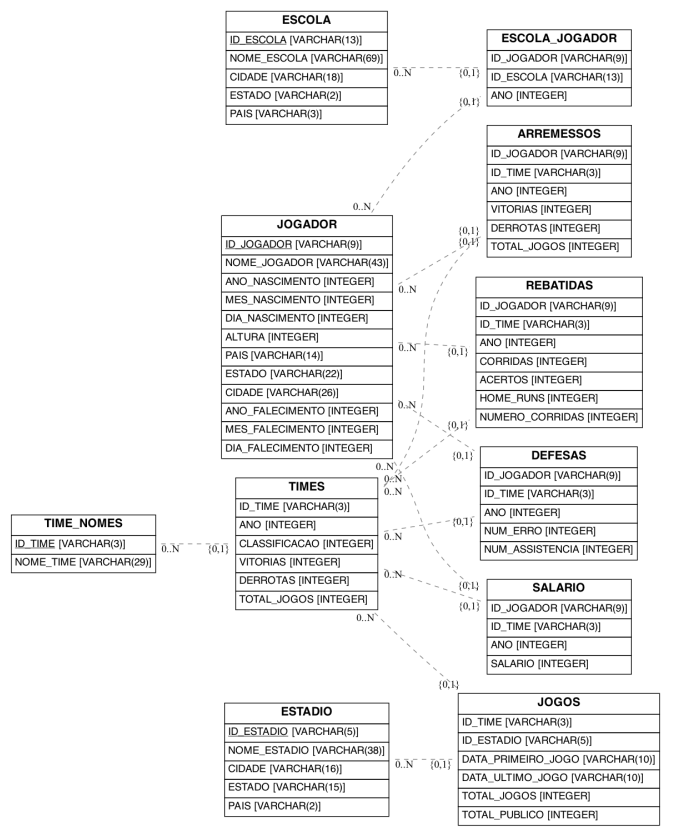
<br>

---

As querys a serem resolvidas são baseadas no número de matrícula do estudante. Portanto, considerando que meu número de matrícula é **2021421869**, eu devo fazer os seguintes exercícios: <br><br>

#### **Especificações em Álgebra Relacional**
Exercícios **A2**, **A0**, **A3**, **A1** e **A4**.

#### **Especificações em Linguagem Natural**
Exercícios **B2**, **B1**, **B8**, **B6** e **B9**.

### **Inicializando os arquivos e o código do banco de dados**

In [ ]:
import io
import sqlite3
import pandas as pd

!wget --quiet -P /tmp/ https://raw.githubusercontent.com/vinisilvag/ibd-database/main/database.sql

conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open('/tmp/database.sql', 'r', encoding='utf-8')
sql = f.read()
cursor.executescript(sql)

### **A2**

In [ ]:
query = """
SELECT DISTINCT
  J.NOME_JOGADOR as NomeJogador, E.NOME_ESCOLA as NomeEscola
FROM
  JOGADOR as J
INNER JOIN ESCOLA_JOGADOR as EJ
  ON J.ID_JOGADOR = EJ.ID_JOGADOR
INNER JOIN ESCOLA as E
  ON EJ.ID_ESCOLA = E.ID_ESCOLA
WHERE
  J.PAIS = 'Mexico'
"""

df = pd.read_sql_query(query, conn)
df

,NomeJogador,NomeEscola
0,Juan Carlos,Parkland College
1,Gabriel de Jesus,University of Southern California
2,Alfredo,St. Petersburg College
3,Rigoberto,University of Wyoming
4,German,Texas Christian University
5,German,Weatherford College
6,Erubiel,Pima Community College
7,Marco Rene,Glendale Community College
8,Marco Rene,California State University Long Beach
9,Luis,"University of California, Los Angeles"


### **A0**

In [ ]:
query = """
SELECT DISTINCT
  TN.NOME_TIME as NomeTime
FROM
  TIME_NOMES as TN
NATURAL JOIN TIMES as T
WHERE
  T.ANO = 2000
"""

df = pd.read_sql_query(query, conn)
df

,NomeTime
0,Anaheim Angels
1,Arizona Diamondbacks
2,Atlanta Braves
3,Baltimore Orioles
4,Boston Red Sox
5,Chicago White Sox
6,Chicago Cubs
7,Cincinnati Reds
8,Cleveland Indians
9,Colorado Rockies


### **A3**

In [ ]:
query = """
SELECT DISTINCT
  TN.NOME_TIME as NomeTime
FROM
  TIMES as T
NATURAL JOIN TIME_NOMES as TN
NATURAL JOIN SALARIO as S
WHERE
  S.SALARIO >= 100000 AND S.SALARIO <= 200000
"""

df = pd.read_sql_query(query, conn)
df

,NomeTime
0,Anaheim Angels
1,Atlanta Braves
2,Baltimore Orioles
3,Boston Red Sox
4,Chicago White Sox
5,Chicago Cubs
6,Cincinnati Reds
7,Detroit Tigers
8,Florida Marlins
9,Milwaukee Brewers


### **A1**

In [ ]:
query = """
SELECT DISTINCT
  E.NOME_ESTADIO as NomeEstadio, TN.NOME_TIME as NomeTime
FROM
  ESTADIO as E
INNER JOIN JOGOS as J
  ON E.ID_ESTADIO = J.ID_ESTADIO
INNER JOIN TIMES as T
  ON J.ID_TIME = T.ID_TIME
INNER JOIN TIME_NOMES as TN
  ON T.ID_TIME = TN.ID_TIME
WHERE
  E.ESTADO = 'CA'
"""

df = pd.read_sql_query(query, conn)
df

,NomeEstadio,NomeTime
0,Los Angeles Memorial Coliseum,Los Angeles Dodgers
1,Seals Stadium,San Francisco Giants
2,Candlestick Park,San Francisco Giants
3,Wrigley Field,Los Angeles Angels of Anaheim
4,Dodger Stadium,Los Angeles Angels of Anaheim
5,Dodger Stadium,Los Angeles Dodgers
6,Oakland-Alameda County Coliseum,Oakland Athletics
7,Qualcomm Stadium,San Diego Padres
8,Angel Stadium of Anaheim,Anaheim Angels
9,AT&T Park,San Francisco Giants


### **A4**

In [ ]:
query = """
SELECT DISTINCT
  R.ID_JOGADOR as IDJogador, R.ACERTOS as Acertos
FROM
  REBATIDAS as R
WHERE
  R.ACERTOS > 200
"""

df = pd.read_sql_query(query, conn)
df

,IDJogador,Acertos
0,damonjo01,214
1,erstada01,240
2,heltoto01,216
3,jeterde01,201
4,sweenmi01,206
...,...,...
65,blackch02,213
66,gordode01,201
67,inciaen01,201
68,deverra01,201


### **B2**

In [ ]:
query = """
SELECT DISTINCT
  TN.NOME_TIME as NomeTime, A.ANO as Ano
FROM
  TIME_NOMES as TN
INNER JOIN ARREMESSOS as A
  ON TN.ID_TIME = A.ID_TIME
GROUP BY TN.ID_TIME, A.ANO
HAVING SUM(A.VITORIAS) > SUM(A.DERROTAS)
ORDER BY SUM(A.VITORIAS) DESC
"""

df = pd.read_sql_query(query, conn)
df

,NomeTime,Ano
0,Seattle Mariners,2001
1,Boston Red Sox,2018
2,Houston Astros,2019
3,Chicago Cubs,2016
4,Houston Astros,2018
...,...,...
308,Miami Marlins,2020
309,Minnesota Twins,2020
310,Toronto Blue Jays,2020
311,St. Louis Cardinals,2020


### **B1**

In [ ]:
query = """
SELECT DISTINCT
  J.NOME_JOGADOR as NomeJogador, R.ANO as Ano, SUM(R.ACERTOS) as TotalAcertos
FROM
  JOGADOR as J
INNER JOIN REBATIDAS as R
  ON J.ID_JOGADOR = R.ID_JOGADOR
GROUP BY J.NOME_JOGADOR, R.ANO
ORDER BY SUM(R.ACERTOS) DESC
LIMIT 1
"""

df = pd.read_sql_query(query, conn)
df

,NomeJogador,Ano,TotalAcertos
0,Mark David,2000,364


### **B8**

In [ ]:
query = """
SELECT DISTINCT
  E.NOME_ESTADIO as NomeEstadio, SUM(J.TOTAL_JOGOS) as TotalJogos
FROM
  ESTADIO as E
INNER JOIN JOGOS as J
  ON E.ID_ESTADIO = J.ID_ESTADIO
GROUP BY E.ID_ESTADIO
ORDER BY SUM(J.TOTAL_JOGOS) DESC
LIMIT 1
"""

df = pd.read_sql_query(query, conn)
df

,NomeEstadio,TotalJogos
0,Fenway Park,8497


### **B6**

In [ ]:
query = """
SELECT DISTINCT
  J.NOME_JOGADOR as NomeJogador, COUNT(S.SALARIO) as QuantidadeSalario
FROM
  JOGADOR as J
INNER JOIN SALARIO as S
  ON J.ID_JOGADOR = S.ID_JOGADOR
WHERE
  J.ANO_FALECIMENTO <> 0
GROUP BY J.ID_JOGADOR
ORDER BY J.NOME_JOGADOR
"""

df = pd.read_sql_query(query, conn)
df

,NomeJogador,QuantidadeSalario
0,Andy Manuel,3
1,Angel Santos,1
2,Anthony Keith,2
3,Bradford Alexander,2
4,Brooks Ulysses,1
5,Charles Wallis,1
6,Christopher Edwin,3
7,Cory Fulton,5
8,Darryl Andrew,3
9,Darryl Quinn,2


### **B9**

In [ ]:
query = """
SELECT DISTINCT
  J.NOME_JOGADOR as NomeJogador
FROM
  JOGADOR as J
INNER JOIN DEFESAS as D
  ON J.ID_JOGADOR = D.ID_JOGADOR
WHERE J.ID_JOGADOR NOT IN (
  SELECT DISTINCT
    J2.ID_JOGADOR
  FROM
    JOGADOR as J2
  INNER JOIN DEFESAS as D2
    ON J2.ID_JOGADOR = D2.ID_JOGADOR
  WHERE
    D2.NUM_ERRO <> 0 AND D2.ANO = 2019 AND J2.PAIS = 'Brazil'
) AND J.PAIS = 'Brazil'
"""

df = pd.read_sql_query(query, conn)
df

,NomeJogador
0,Andre Albanez
1,Paulo Roberto
2,Luiz Henrique
